# **Optical Character Recognition**

In [ ]:
!apt-get install poppler-utils
!pip install pdf2image
!pip install easyocr
!pip install opencv-python-headless==4.5.2.52

In [2]:
# Import Library.
import pandas as pd
import numpy as np
from pdf2image import convert_from_path
import easyocr
import PIL
from PIL import ImageDraw
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

# **Parsing PDF using Python and NLP**

In [3]:
# Extract PDF File.
!wget https://writing.colostate.edu/guides/documents/resume/functionalSample.pdf

--2022-07-22 05:22:05--  https://writing.colostate.edu/guides/documents/resume/functionalSample.pdf
Resolving writing.colostate.edu (writing.colostate.edu)... 129.82.210.34
Connecting to writing.colostate.edu (writing.colostate.edu)|129.82.210.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98553 (96K) [application/pdf]
Saving to: ‘functionalSample.pdf’

functionalSample.pd 100%[===================>]  96.24K  --.-KB/s    in 0.09s   

2022-07-22 05:22:06 (1.08 MB/s) - ‘functionalSample.pdf’ saved [98553/98553]



In [ ]:
reader = easyocr.Reader(["en"])

images = convert_from_path("functionalSample.pdf")

bounds = reader.readtext(
    np.array(images[0]),
    min_size=0,
    slope_ths=0.2,
    ycenter_ths=0.7,
    height_ths=0.6,
    width_ths=0.8,
    decoder="beamsearch",
    beamWidth=10,
)

In [ ]:
from IPython.display import display, Image

display(images[0])

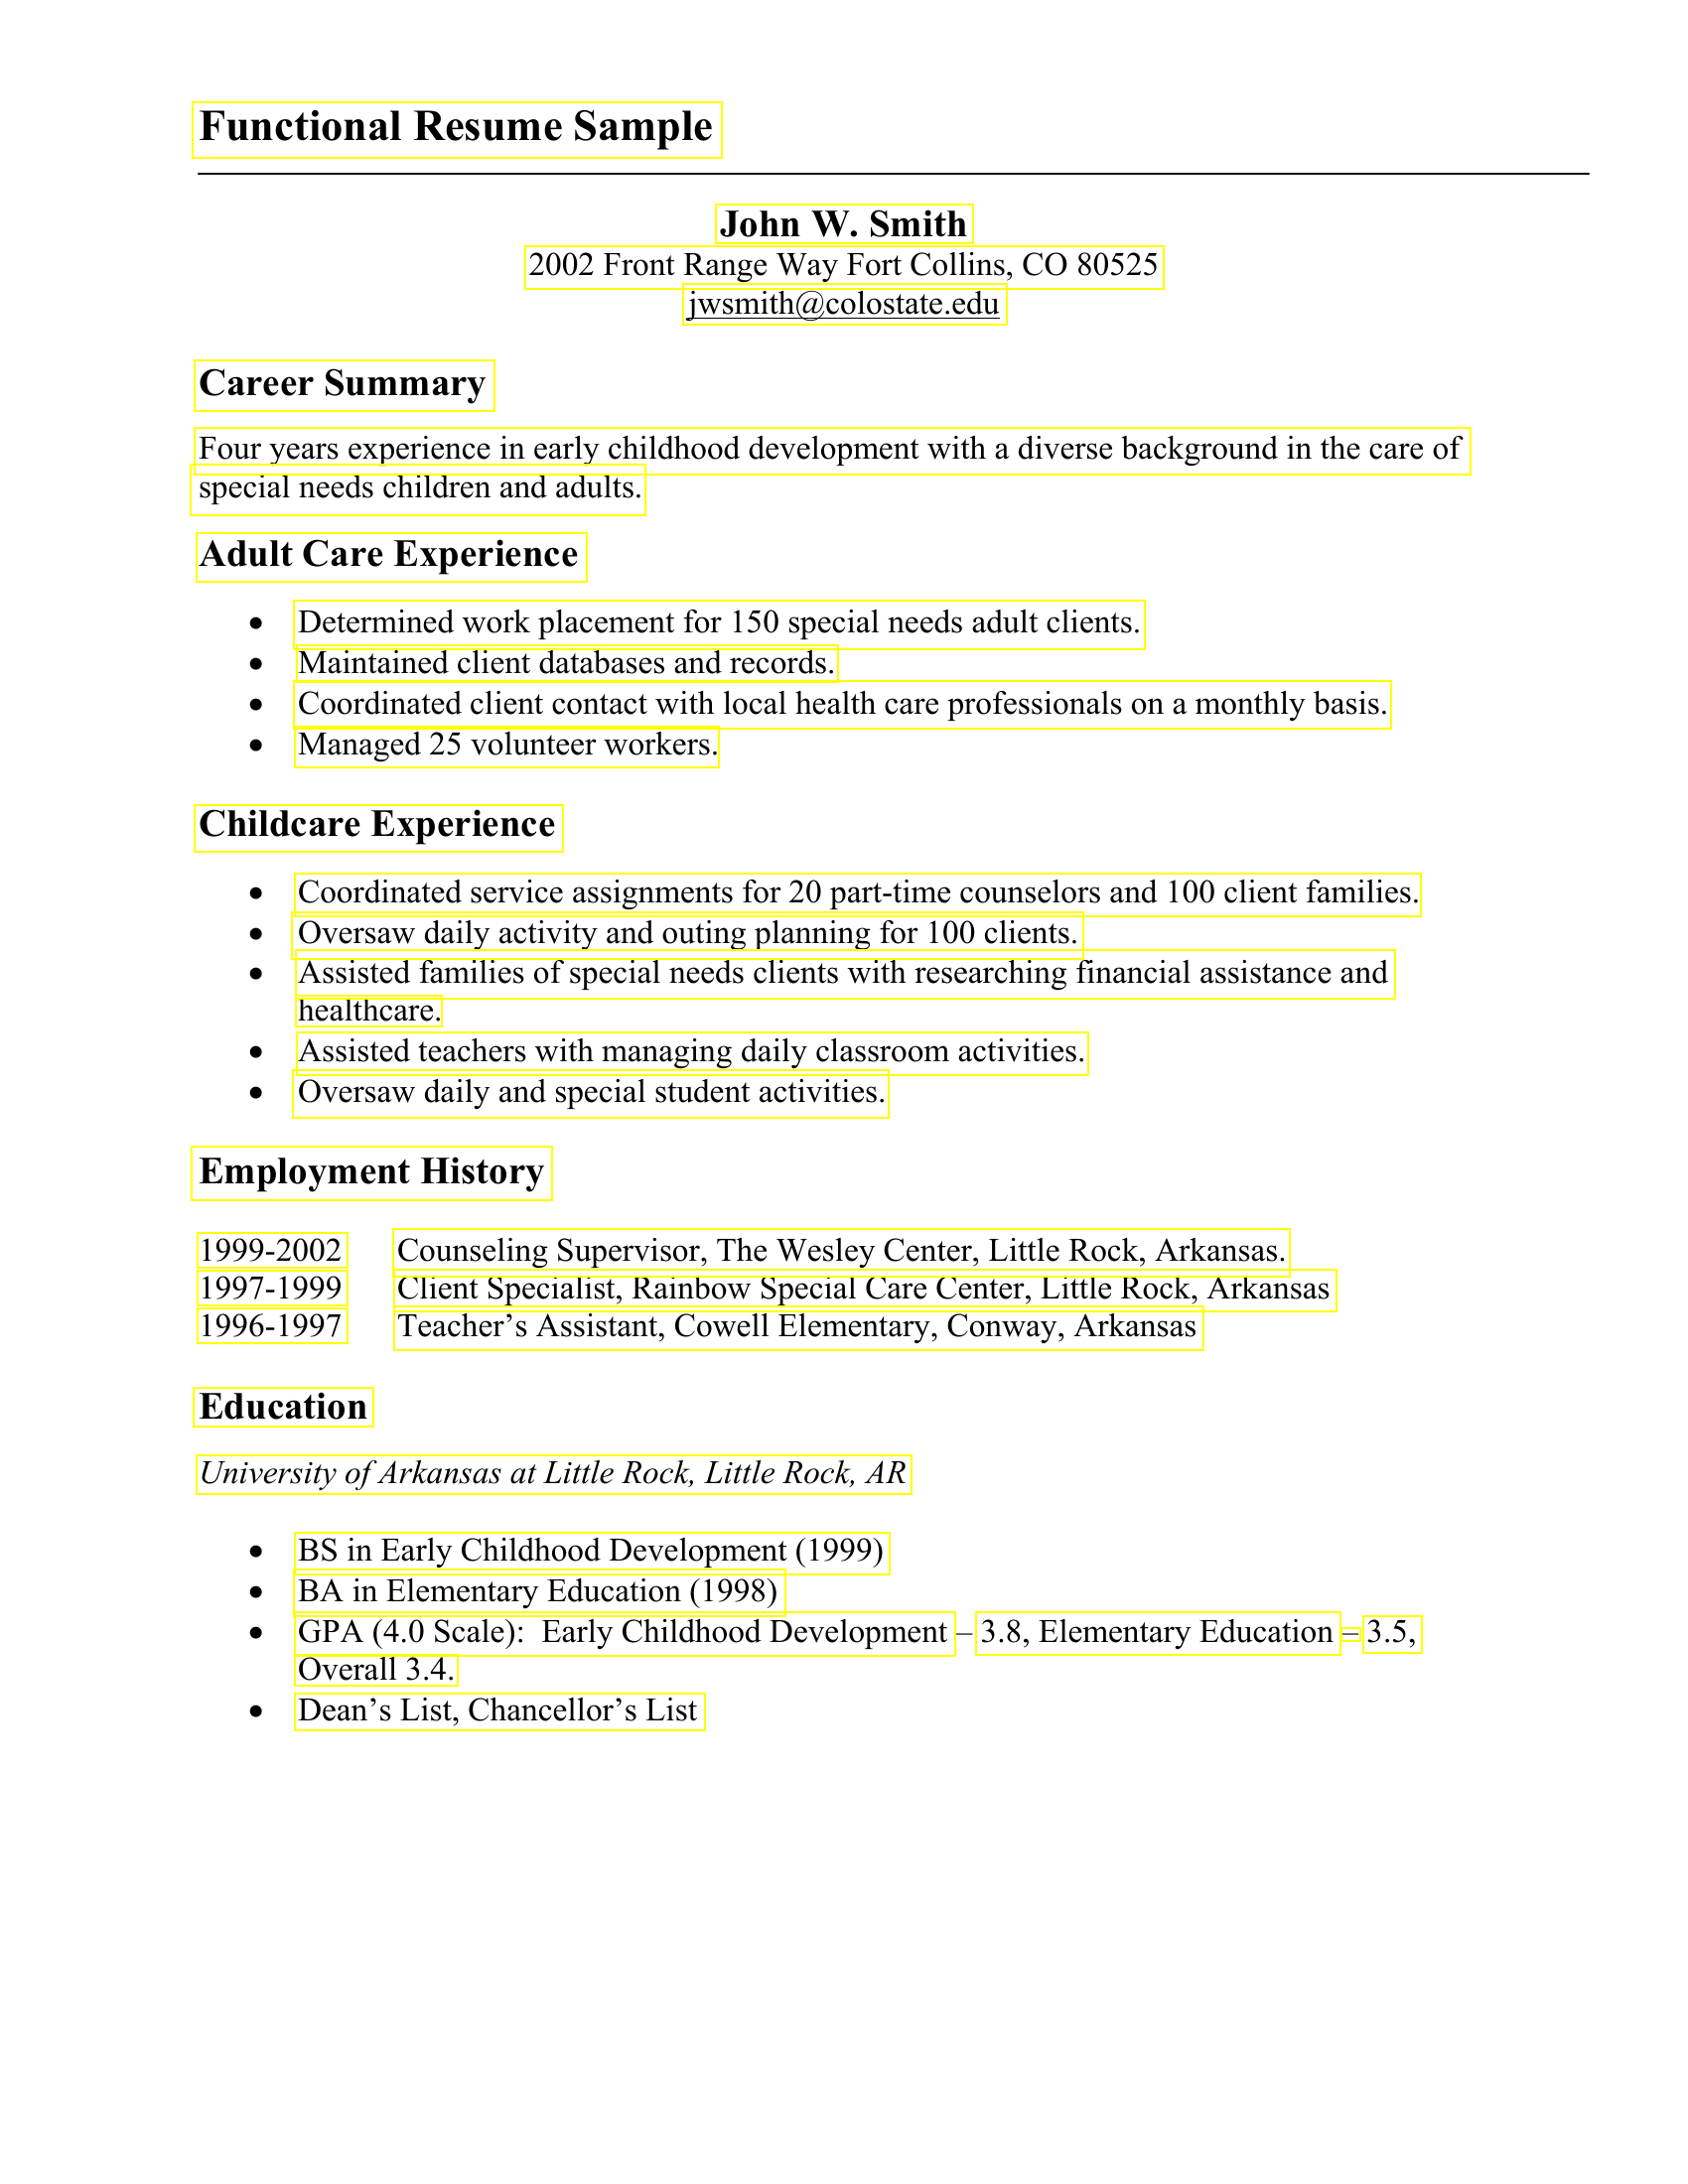

In [6]:
def draw_boxes(image, bounds, color="yellow", width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image


draw_boxes(images[0], bounds)

In [7]:
bounds[1][1]

'John W. Smith'

In [8]:
text = ""
for i in range(len(bounds)):
    text = text + bounds[i][1] + "\n"

print(text)

Functional Resume Sample
John W. Smith
2002 Front Range Way Fort Collins, CO 80525
iwsmith@colostate_edu
Career Summary
Four years experience in early childhood development with a diverse background in the care of
special needs children and adults
Adult Care Experience
Determined work placement for 150 special needs adult clients.
Maintained client databases and records.
Coordinated client contact with local health care professionals o a monthly basis.
Managed 25 volunteer workers.
Childcare Experience
Coordinated service assignments for 20 part-time counselors and 100 client families
Oversaw daily activity and outing planning for 100 clients.
Assisted families of special needs clients with researching financial assistance and
healthcare.
Assisted teachers with managing daily classroom activities.
Oversaw daily and special student activities
Employment History
1999-2002
Counseling Supervisor; The Wesley Center, Little Rock Arkansas
1997-1999
Client Specialist; Rainbow Special Care Cent

In [9]:
doc = nlp(text)

displacy.render(nlp(doc.text), style="ent", jupyter=True)

# **Parsing Image in Python and NLP**

In [10]:
# Extract Image File.
!wget https://i.pinimg.com/564x/ee/40/7e/ee407ede9d8e0d4d869f8d3e81d1b28d.jpg

--2022-07-22 05:23:26--  https://i.pinimg.com/564x/ee/40/7e/ee407ede9d8e0d4d869f8d3e81d1b28d.jpg
Resolving i.pinimg.com (i.pinimg.com)... 146.75.32.84, 2a04:4e42:77::84
Connecting to i.pinimg.com (i.pinimg.com)|146.75.32.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40003 (39K) [image/jpeg]
Saving to: ‘ee407ede9d8e0d4d869f8d3e81d1b28d.jpg’

ee407ede9d8e0d4d869 100%[===================>]  39.07K  --.-KB/s    in 0.003s  

2022-07-22 05:23:26 (13.1 MB/s) - ‘ee407ede9d8e0d4d869f8d3e81d1b28d.jpg’ saved [40003/40003]



In [ ]:
reader = easyocr.Reader(["en"])

img = PIL.Image.open("ee407ede9d8e0d4d869f8d3e81d1b28d.jpg")

bounds = reader.readtext(
    "ee407ede9d8e0d4d869f8d3e81d1b28d.jpg",
    contrast_ths=0.05,
    adjust_contrast=0.7,
    add_margin=0.45,
    width_ths=0.7,
    decoder="beamsearch",
)

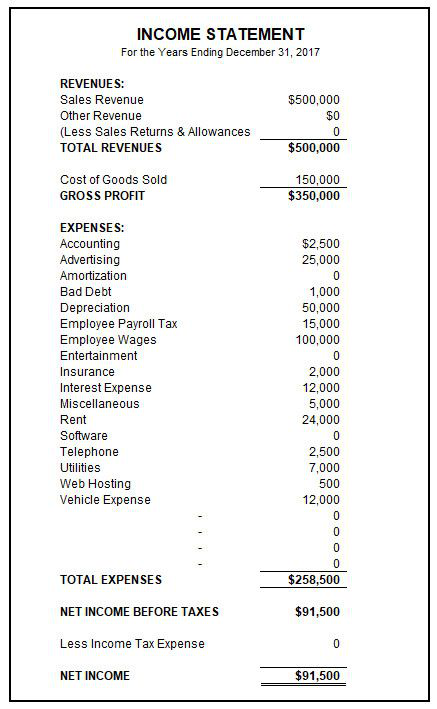

In [12]:
img

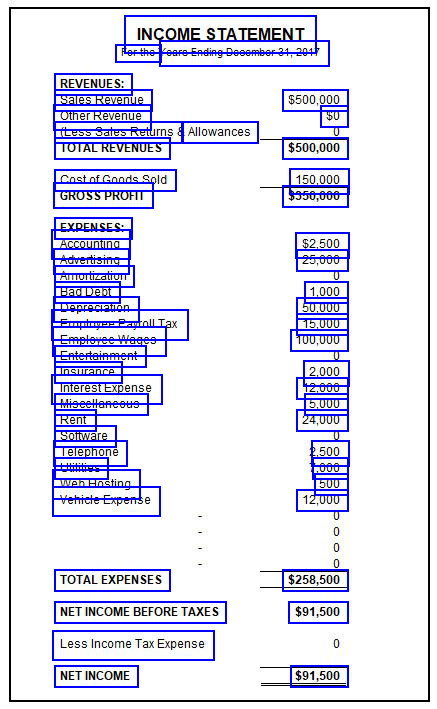

In [13]:
def draw_boxes(image, bounds, color="blue", width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image


draw_boxes(img, bounds)

In [14]:
text = ""
for i in range(len(bounds)):
    text = text + bounds[i][1] + "\n"

print(text)

INCOME STATEMENT 
For the`
rears Ending December 31,2017
REVENUES:
Sales Revenue
ss00,0o0
~Other Revenue
S0
(Less Sales Returns E
Alowances
TOTAL REVENUES
75500,000
Cost of Goods Sold
J150,000 _
~GROSS PROFIT
7350,000
EXPENSES:
Accounting
52.500
Advertising
25,000
Amortization
Bad Debt
1,000
Depreciation
50,000
Employee Payrol Tax
15,000
Emplovee Wages
100,00o
Entertainment
Insurance
2000
Interest Expense
12,000
Miscelaneous
5,000
Rent
24,000
Software
Telephone
500
Utilities
.ooo
Web Hosting
500
Vehicle Expense
12,000
TOTAL EXPENSES
3258,500 _
NET INCOME BEFORE TAXES
$91,500
~Less Income Tax Expense
NET INCOME
591,500 



In [15]:
doc = nlp(text)

displacy.render(nlp(doc.text), style="ent", jupyter=True)

### **Reference:**

> **keras-ocr** [**[GitHub]**](https://github.com/srivatsan88/keras-ocr)  [**[Documentation]**](https://keras-ocr.readthedocs.io/en/latest/)